<a href="https://colab.research.google.com/github/DevanshGoswami/TimeSeriesAnalysis/blob/master/Climate_Change_In_PUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('PuneTempChange.csv')
df = pd.DataFrame(df)
df = df.set_index("Date")
temp = df['Temp']
M = temp.dropna().mean()
temp = temp.replace(np.NaN,M)
print(df.head())

              Temp
Date              
1796-01-01  20.507
1796-02-01  22.483
1796-03-01  25.074
1796-04-01  28.756
1796-05-01  29.944


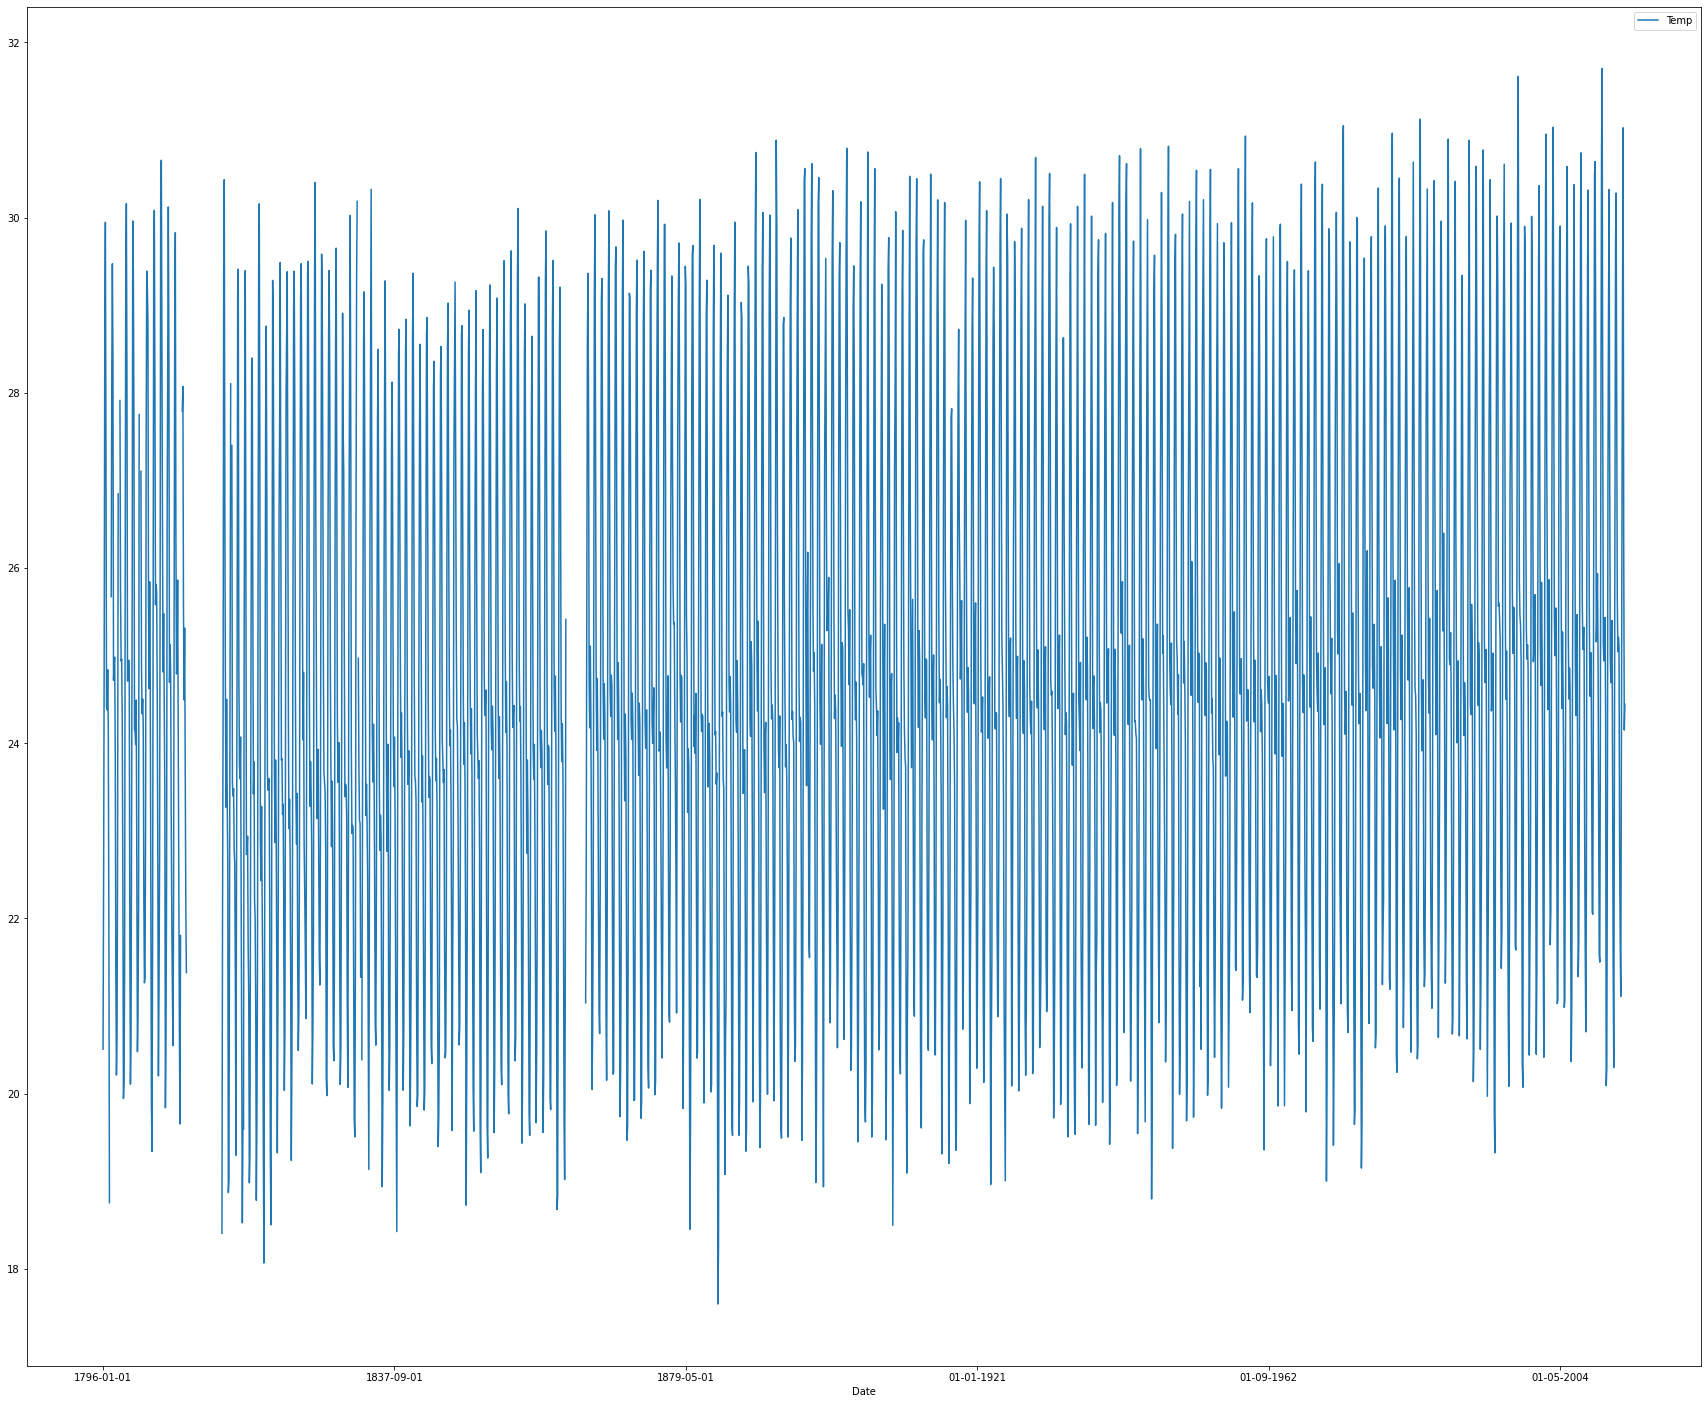

In [0]:
import matplotlib.pyplot as plt
df.plot(figsize=(30,25))
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(temp)
print(result)
print(result[1])

(-4.861551626643046, 4.1409535380301455e-05, 25, 2587, {'1%': -3.4328802668982084, '5%': -2.862657875000973, '10%': -2.5673650853551155}, 5860.746495509926)
4.1409535380301455e-05


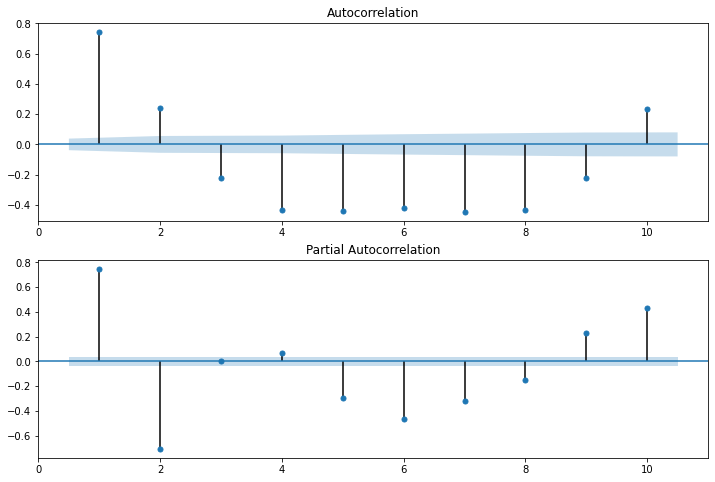

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(temp, lags=10,zero=False,ax=ax1)
plot_pacf(temp, lags=10,zero=False,ax=ax2)
plt.show()

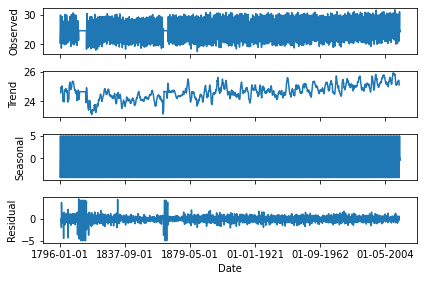

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(temp,freq=12)
decomp.plot()
plt.show()

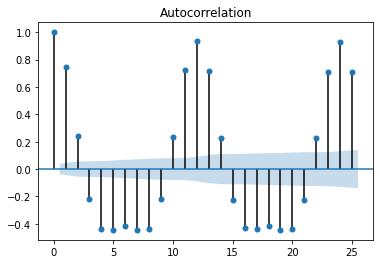

In [0]:
temp2 = temp - temp.rolling(15).mean()
temp2 = temp2.dropna()
fig , ax = plt.subplots()
plot_acf(temp,lags=25,zero=True,ax=ax)
plt.show()


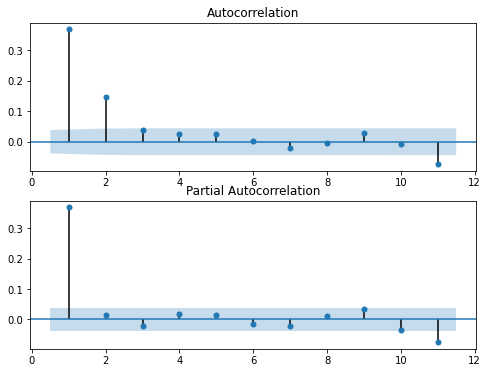

In [0]:
Dif = temp.diff(12).dropna()
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(Dif,lags=11,zero=False,ax=ax1)
plot_pacf(Dif,lags=11,zero=False,ax=ax2)
plt.show()

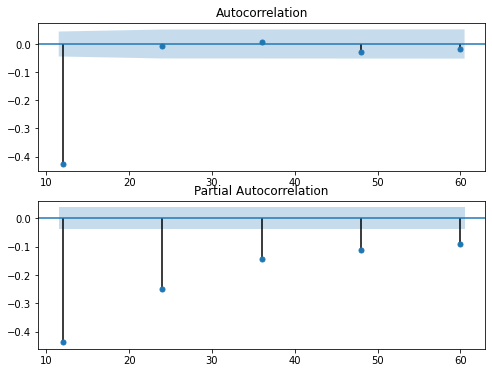

In [0]:
lags = [12,24,36,48,60]
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(Dif,lags=lags,zero=False,ax=ax1)
plot_pacf(Dif,lags=lags,zero=False,ax=ax2)
plt.show()

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(5):
    for q in range(5):
        try:
                model = SARIMAX(Dif, order=(p,0,q),seasonal_order=(2,1,2,12),trend='c')
                results = model.fit()
                order_aic_bic.append((p,q,results.aic,results.bic))
        except:
                order_aic_bic.append((p,q,None,None))
          
      
        
        

order_df = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])
print(order_df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/bas

    p  q          AIC          BIC
0   0  0  6633.870615  6669.024777
1   0  1  6025.494535  6066.507724
2   0  2  5909.562254  5956.434470
3   0  3  6001.843979  6054.575222
4   0  4  5940.824770  5999.415040
5   1  0  6167.279214  6208.292403
6   1  1  5917.515645  5964.387861
7   1  2  6032.522186  6085.253429
8   1  3  6396.212410  6454.802679
9   1  4  6053.486941  6117.936238
10  2  0  6126.805834  6173.678049
11  2  1  6175.280944  6228.012187
12  2  2  6362.255968  6420.846238
13  2  3  6389.903222  6454.352519
14  2  4  6304.993591  6375.301915
15  3  0  6279.389802  6332.121045
16  3  1  5979.363963  6037.954233
17  3  2  6133.368485  6197.817782
18  3  3  6365.441551  6435.749875
19  3  4  6212.159048  6288.326399
20  4  0  6167.351181  6225.941451
21  4  1  6020.056325  6084.505621
22  4  2  6401.683180  6471.991504
23  4  3  6270.165778  6346.333129
24  4  4  6231.011932  6313.038309


In [0]:
order_df.sort_values(by=['AIC'])

,p,q,AIC,BIC
2,0,2,5909.562254,5956.434470
6,1,1,5917.515645,5964.387861
4,0,4,5940.824770,5999.415040
16,3,1,5979.363963,6037.954233
3,0,3,6001.843979,6054.575222
21,4,1,6020.056325,6084.505621
1,0,1,6025.494535,6066.507724
7,1,2,6032.522186,6085.253429
9,1,4,6053.486941,6117.936238
10,2,0,6126.805834,6173.678049


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               Temp   No. Observations:                 2601
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -3273.109
Date:                            Fri, 12 Jun 2020   AIC                           6562.217
Time:                                    12:54:17   BIC                           6609.086
Sample:                                         0   HQIC                          6579.203
                                           - 2601                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.282e-06   7.68e-05     -0.095      0.924      -0.000       0.000
ma.L1         -0.5802      0.013   

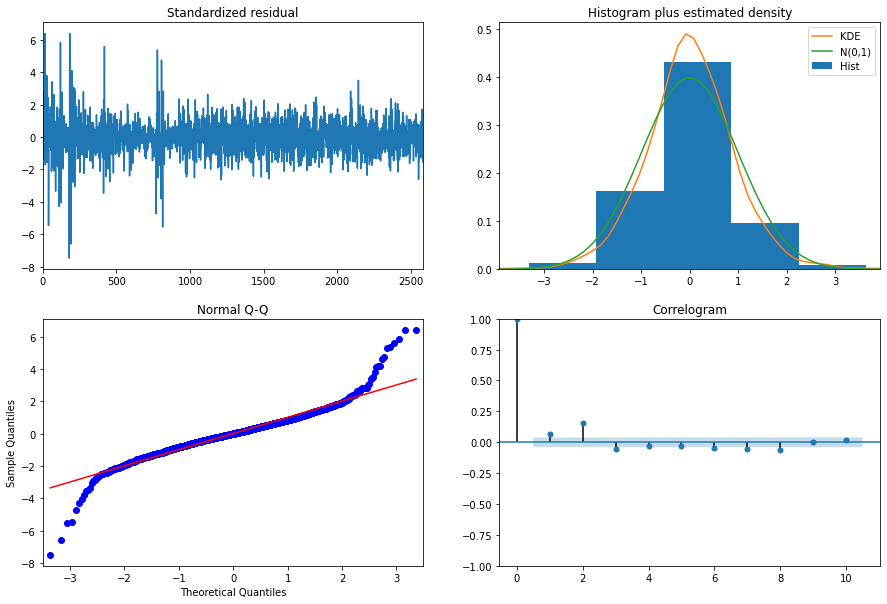

In [0]:
mod = SARIMAX(Dif, order=(0,1,2),seasonal_order=(2,1,2,12),trend='c')
res = mod.fit()
print(res.summary())
print(res.resid)
res.plot_diagnostics(figsize=(15,10))
plt.show()

In [0]:

Pred = res.get_forecast(steps=114)
Mean = Pred.predicted_mean
confidence_intervals = Pred.conf_int()
print(confidence_intervals)
print("-------------------------------------------------")
print(Mean)
ll = confidence_intervals.loc[:,'lower Temp']
ul = confidence_intervals.loc[:,'upper Temp']



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


      lower Temp  upper Temp
2601   -1.743282    1.579922
2602   -1.337686    2.266467
2603   -2.573917    1.042301
2604   -2.578526    1.049717
2605   -2.377068    1.263162
...          ...         ...
2710   -2.526725    2.111075
2711   -2.485951    2.156633
2712   -2.505675    2.141688
2713   -2.500579    2.151558
2714   -2.515373    2.141533

[114 rows x 2 columns]
-------------------------------------------------
2601   -0.081680
2602    0.464390
2603   -0.765808
2604   -0.764404
2605   -0.556953
          ...   
2710   -0.207825
2711   -0.164659
2712   -0.181993
2713   -0.174511
2714   -0.186920
Length: 114, dtype: float64


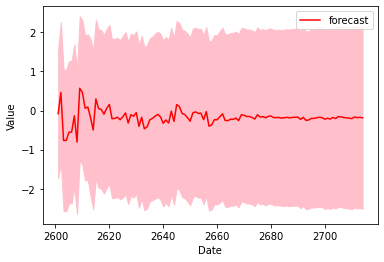

In [0]:
plt.plot(Mean.index, Mean, color='r', label='forecast')
plt.fill_between(Mean.index,ll,ul,color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()